In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
train = pd.read_csv("./data/train.csv", index_col="PassengerId")
test = pd.read_csv("./data/test.csv", index_col="PassengerId")

In [40]:
train.loc[train['Sex'] == 'male', 'Sex_revised'] = 0
train.loc[train['Sex'] != 'male', 'Sex_revised'] = 1

test.loc[test['Sex'] == 'male', 'Sex_revised'] = 0
test.loc[test['Sex'] != 'male', 'Sex_revised'] = 1

In [41]:
test[pd.isnull(test['Fare'])]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_revised
PassengerId,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0.0


In [42]:
mean_fare = train['Fare'].mean()

In [43]:
test.loc[pd.isnull(test['Fare']), 'Fare'] = mean_fare

In [44]:
test[pd.isnull(test['Fare'])]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_revised
PassengerId,,,,,,,,,,,


In [45]:
feature_names = ['Sex_revised', 'Pclass']

In [46]:
train['Embarked_C'] = train['Embarked'] == 'C'
train['Embarked_S'] = train['Embarked'] == 'S'
train['Embarked_Q'] = train['Embarked'] == 'Q'

In [47]:
train[['Embarked_C','Embarked_S', 'Embarked_Q']].head()

,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,
1,False,True,False
2,True,False,False
3,False,True,False
4,False,True,False
5,False,True,False


In [48]:
test['Embarked_C'] = test['Embarked'] == 'C'
test['Embarked_S'] = test['Embarked'] == 'S'
test['Embarked_Q'] = test['Embarked'] == 'Q'

In [49]:
test[['Embarked_C','Embarked_S', 'Embarked_Q']].head()

,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,
892,False,False,True
893,False,True,False
894,False,False,True
895,False,True,False
896,False,True,False


In [50]:
train['Cabin_Tp'] = pd.isnull(train['Cabin'])

In [51]:
X_train = train[feature_names]
X_test = test[feature_names]

In [52]:
y_train = train['Survived']

In [53]:
y_train.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
import os

In [61]:
seed = 7
model = DecisionTreeClassifier(max_depth=7, random_state=seed)

In [62]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=7,
            splitter='best')

In [63]:
prediction = model.predict(X_test)

In [64]:
export_graphviz(model, feature_names=feature_names, class_names=['Dead','Survived'], out_file='decision_tree.dot')

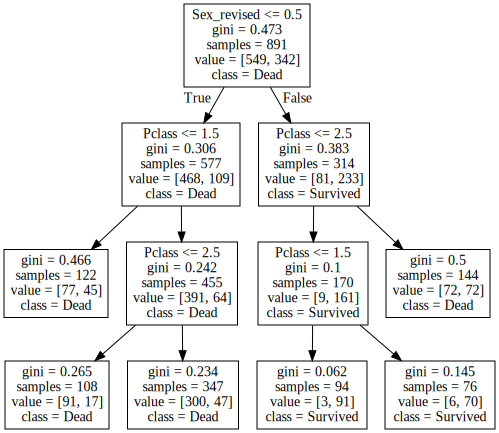

In [60]:
with open('decision_tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

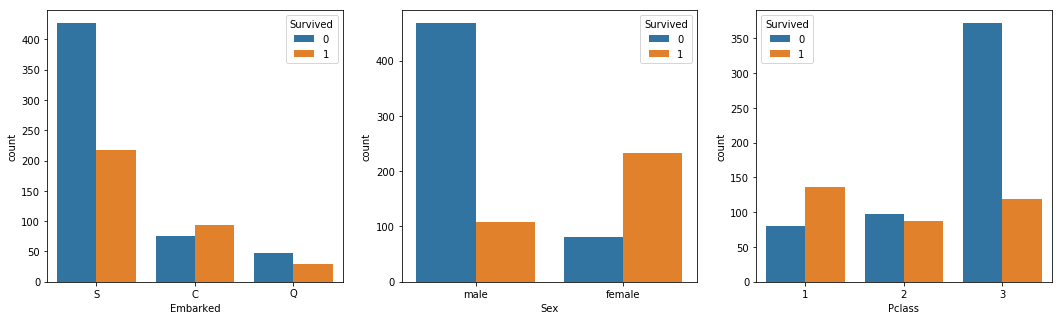

In [71]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(18,5)
sns.countplot(data=train, x='Embarked', hue='Survived', ax=ax1)
sns.countplot(data=train, x='Sex', hue='Survived', ax=ax2)
sns.countplot(data=train, x='Pclass', hue='Survived', ax=ax3)

In [76]:
train['Single'] = train['SibSp'] + train['Parch']

In [78]:
pd.pivot_table(data=train, index='Single', values='Survived')

,Survived
Single,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [79]:
train['Cabin_Tp'] = pd.isnull(train['Cabin'])

In [80]:
pd.pivot_table(data=train, index='Cabin_Tp', values='Survived')

,Survived
Cabin_Tp,
False,0.666667
True,0.299854


In [67]:
submit = pd.read_csv('./data/gender_submission.csv', index_col='PassengerId')

In [ ]:
submit['Survived'] = prediction